<ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 01/10/2019 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"

In [0]:
!pip install yfinance

In [0]:
from bs4 import BeautifulSoup
import requests
import yfinance as yf
import json
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

In [0]:
## Método para buscar todos os papéis dentro da url de cada índice usando BeautifulSoup
def get_papers(url):
  source_code = requests.get(url)
  plain_text = source_code.text
  soup = BeautifulSoup(plain_text, features="lxml")
  paper_codes = []
  for paper_code in soup.findAll('td', {'class' : 'rgSorted'}):
    paper_code = paper_code.find('span')
    if(paper_code.text != ""):
      paper_codes.append(paper_code.text)
      
  return paper_codes

## Definimos como os índices desejados sendo os setoriais: IEE, IMOB, IFNC, ICON, INDX
urls = ['http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IEEX&idioma=pt-br',
       'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IMOB&idioma=pt-br',
       'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IFNC&idioma=pt-br',
        'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=ICON&idioma=pt-br',
       'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=INDX&idioma=pt-br']

papers_by_index = []
for url in urls:
  papers_by_index.append(get_papers(url))
  

In [0]:
## Para cada papel, buscar informações no yahoo finances
def get_negotiations(papers):
  paper_negotiations = []
  for paper in papers:
    ticker = yf.Ticker(paper + '.SA')
    paper_negotiations.append([ticker.info['symbol'], ticker.info['regularMarketVolume']])
    
  dataset = pd.DataFrame(paper_negotiations, columns = ['symbol', 'volume'])
  dataset.sort_values('volume', ascending = False, inplace = True)
  
  return dataset[:3]

indexes = ['IEE', 'IMOB', 'IFNC', 'ICON', 'INDX']
chosen_papers = {}
most_negotiated_list = {}

for i in range(0, 5):
  most_negotiated = get_negotiations(papers_by_index[i])
  most_negotiated_list[indexes[i]] = most_negotiated['symbol'].tolist()
  chosen_papers[indexes[i]] = most_negotiated


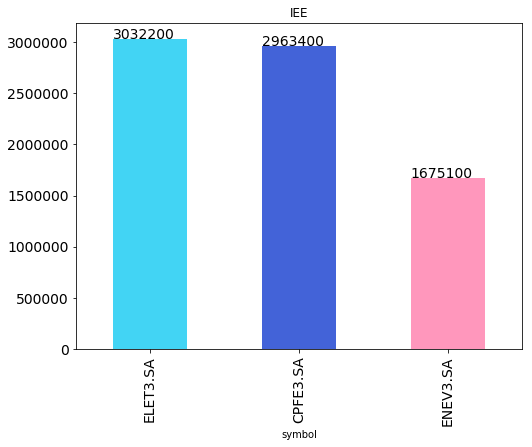

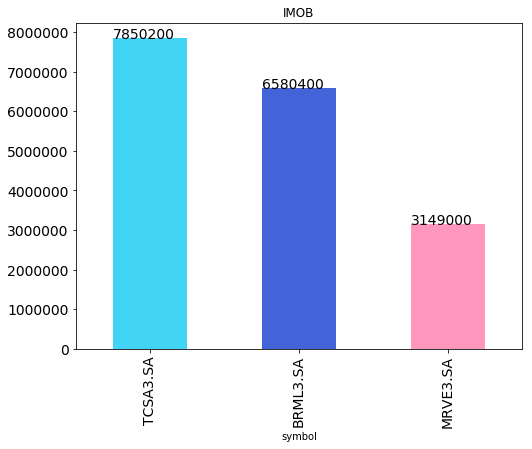

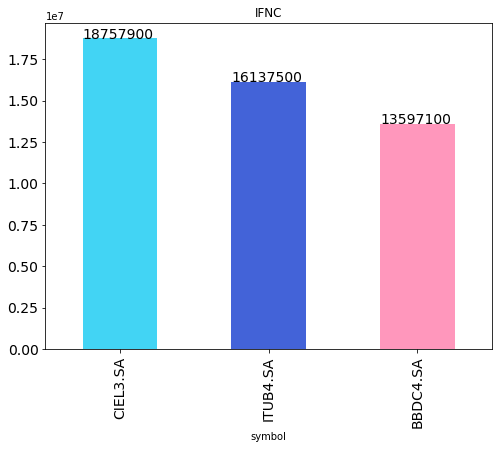

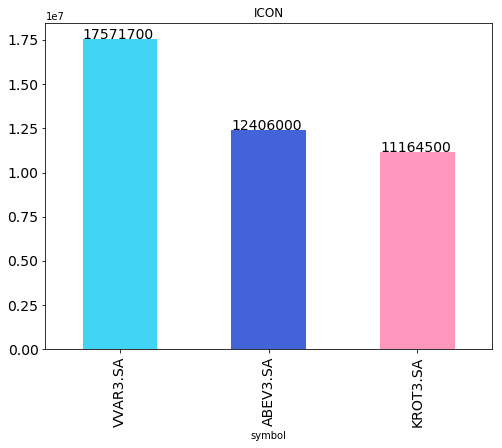

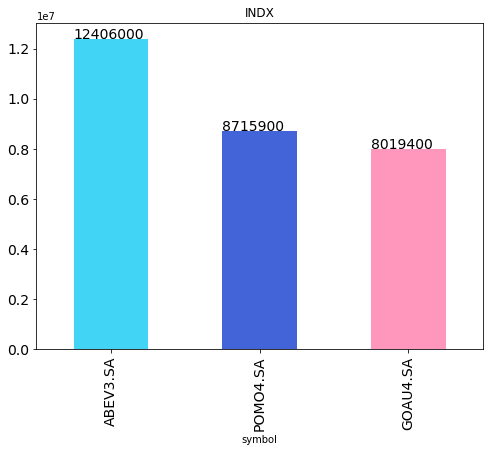

In [0]:
## Imprimindo um gráfico de barras dos papéis para cada índice
colors = ['#42d4f4', '#4363d8', '#FF97BC', '#e6beff']

for chosen_paper in chosen_papers:
  bar = chosen_papers[chosen_paper].plot.bar(x = 'symbol', y = 'volume', color = colors, figsize=(8,6), fontsize=14, title = chosen_paper, legend = False)
  for i in bar.patches:
    bar.text(i.get_x(), i.get_height()+20, \
        str(round((i.get_height()), 2)), fontsize=14)

In [0]:
## Imprimindo gráficos com as cotações diárias nos últimos 24 meses
yf.pdr_override() 
def get_daily_prices(papers):
  paper_prices = []
  for paper in papers:
    dataset = pdr.get_data_yahoo(paper, start="2017-09-10", end="2019-09-10").reset_index()

    fig = go.Figure(data=go.Ohlc
                    (x=dataset['Date'],
                    open=dataset['Open'],
                    high=dataset['High'],
                    low=dataset['Low'],
                    close=dataset['Close']))
    fig.show()
    paper_prices.append(dataset)

  return paper_prices

paper_prices = {}
for i in range(0, 5):
  paper_prices[indexes[i]] = get_daily_prices(most_negotiated_list[indexes[i]])


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded


[*********************100%***********************]  1 of 1 downloaded
